# Deep Learning Project Notebook

### Import modulde

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src import download_data,model,train,evaluate,preprocessed,loss
import importlib
import tensorflow as tf



C:\Users\coren\AppData\Local\Temp\ipykernel_20424\4247462051.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [55]:
importlib.reload(download_data)
importlib.reload(model)
importlib.reload(train)
importlib.reload(evaluate)
importlib.reload(preprocessed)
importlib.reload(loss)

<module 'src.loss' from 'c:\\Users\\coren\\Projet Deep Learning\\CS230\\src\\loss.py'>

### Download_data

In [3]:
download_data.download_data()

### Process data

In [4]:
num_input = preprocessed.preprocess_data_features()
temp,dev = preprocessed.split_dataset_dev()

## Declare Model

### Model 1 : one layer model

In [29]:
layers = []
input_num = num_input
batch_size = 1024
epoch = 10
learning_rate = 0.001

Epoch 1/10


224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7743 - loss: 0.5228 - val_accuracy: 0.8529 - val_loss: 0.3831
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.3817 - val_accuracy: 0.8575 - val_loss: 0.3664
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 0.3657 - val_accuracy: 0.8598 - val_loss: 0.3570
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.3571 - val_accuracy: 0.8612 - val_loss: 0.3517
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8587 - loss: 0.3518 - val_accuracy: 0.8612 - val_loss: 0.3482
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8590 - loss: 0.3484 - val_accuracy: 0.8611 - val_loss: 0.3457
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8591 - loss: 0.3460 - val_accuracy: 0.8609 - val_loss: 0.3437
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3442 - val_accuracy: 0.8607 - val_

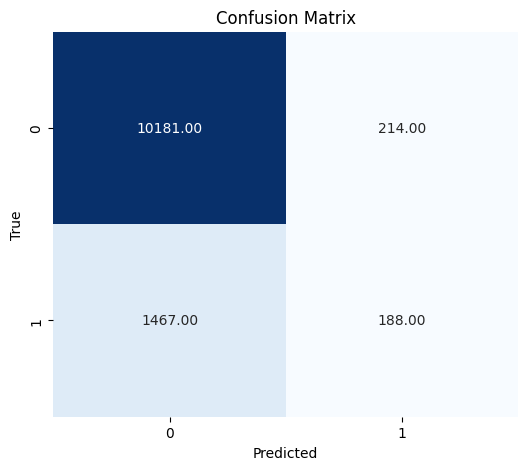

{'accuracy': 0.8604979253112033,
 'f1_score': 0.18279047156052503,
 'false_positive': 214.0,
 'false_negative': 1467.0}

In [30]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
model_one_layer = model.create_sequential_model(input_num,hidden_layers=layers,dropout_rates=0.1)
criterion = loss.WeightedBCELoss(w1 = 5.0, w2 = 1.0)
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)


history,test_data = train.train_model(temp,model_one_layer,criterion,optimizer_adam,epoch,batch_size=batch_size)

evaluate.evaluate_model(model_one_layer,test_data)

### Model 2 : MLP

Epoch [1/100], Loss: 0.7955
Epoch [2/100], Loss: 0.7967
Epoch [3/100], Loss: 0.7959
Epoch [4/100], Loss: 0.7961
Epoch [5/100], Loss: 0.7951
Epoch [6/100], Loss: 0.7955
Epoch [7/100], Loss: 0.7957
Epoch [8/100], Loss: 0.7951
Epoch [9/100], Loss: 0.7948
Epoch [10/100], Loss: 0.7953
Epoch [11/100], Loss: 0.7951
Epoch [12/100], Loss: 0.7945
Epoch [13/100], Loss: 0.7957
Epoch [14/100], Loss: 0.7941
Epoch [15/100], Loss: 0.7943
Epoch [16/100], Loss: 0.7946
Epoch [17/100], Loss: 0.7951
Epoch [18/100], Loss: 0.7943
Epoch [19/100], Loss: 0.7940
Epoch [20/100], Loss: 0.7941
Epoch [21/100], Loss: 0.7939
Epoch [22/100], Loss: 0.7946
Epoch [23/100], Loss: 0.7945
Epoch [24/100], Loss: 0.7937
Epoch [25/100], Loss: 0.7940
Epoch [26/100], Loss: 0.7947
Epoch [27/100], Loss: 0.7931
Epoch [28/100], Loss: 0.7933
Epoch [29/100], Loss: 0.7924
Epoch [30/100], Loss: 0.7934
Epoch [31/100], Loss: 0.7933
Epoch [32/100], Loss: 0.7931
Epoch [33/100], Loss: 0.7929
Epoch [34/100], Loss: 0.7932
Epoch [35/100], Loss: 0

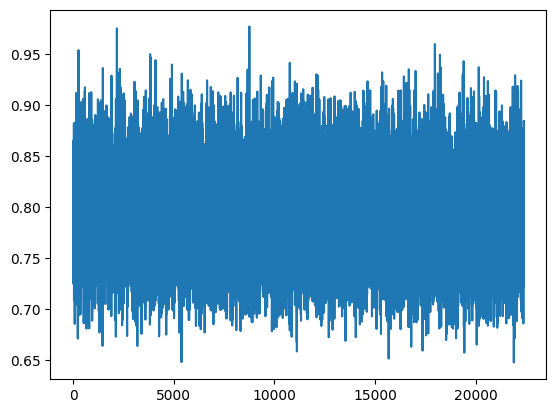

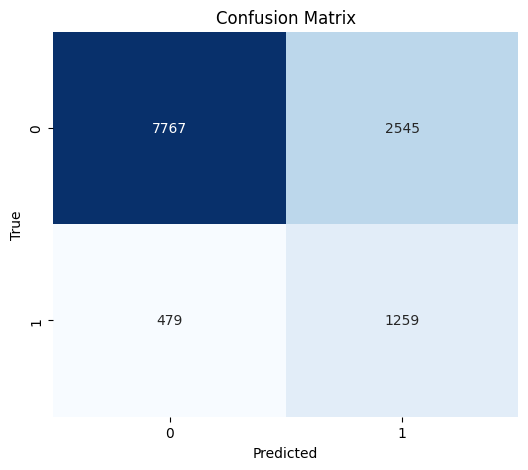

{'accuracy': 0.749045643153527,
 'f1_score': 0.4543486106098881,
 'false_positive': 2545,
 'false_negative': 479}

In [6]:
hidden_layers = [200,200,70]
model_mlp = model.create_sequential_model(num_input,hidden_layers,dropout_rates=0.2)
criterion = loss.WeightedBCELoss(w1 = 5.0, w2 = 1.0)
optimizer = optim.Adam(model_one_layer.parameters(), lr=0.0001,betas= (0.9,0.99))

train_losses,test_data = train.train_model(temp,model_one_layer,criterion,optimizer,100,batch_size=1024)
plt.plot(train_losses)

evaluate.evaluate_model(model_one_layer,test_data)

## Download Dataset kaggle

In [31]:
df_raw = pd.read_csv("C:/Users/coren/Projet Deep Learning/CS230/local/data/raw/df_2011")

### Process dataset

In [32]:
from src import process_oversampling,process_datasets,process_datasets_v2

In [33]:
importlib.reload(process_datasets)
importlib.reload(process_oversampling)
importlib.reload(process_datasets_v2)

<module 'src.process_datasets_v2' from 'c:\\Users\\coren\\Projet Deep Learning\\CS230\\src\\process_datasets_v2.py'>

In [34]:
temp_2011_1 = process_datasets_v2.process_dataset(df_raw)
temp_2011_2 = process_oversampling.process_part_2(temp_2011_1)
temp_2011,dev_2011 = process_oversampling.undersample_train_test_NM(temp_2011_1)

In [35]:
layers = [40]
input_num = 2
batch_size = 1024
epoch = 10
learning_rate = 0.001

In [56]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
model_2011 = model.create_sequential_model(input_num,hidden_layers=layers,dropout_rates=0.1)
criterion = loss.WeightedBCELoss(w1 = 5.0, w2 = 1.0)
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)


history,test_data = train.train_model(temp_2011,model_2011,criterion,optimizer_adam,epoch,batch_size=batch_size)

evaluate.evaluate_model(model_2011,test_data)

ValueError: too many values to unpack (expected 2)

In [40]:
print(test_data)

<_SkipDataset element_spec=(TensorSpec(shape=(2,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
